In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


## Data Set
We will use Housing Price dataset to apply first three ML models. This data set has several features related to respective houses. SalesPrice is the target variable (y). We can use rest of the features as Independent variables (x).

## **Implement Decision Tree**

In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Path of the file to read
iowa_file_path = '../input/train.csv'
home_data = pd.read_csv(iowa_file_path)

In [ ]:
home_data.head()

In [4]:
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1,max_leaf_nodes=100)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error

val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))


Validation MAE: 27,283


In [ ]:
## Write a function to find out the best value of max leaf node
tune=[0,5,10,20,100,500]


In [5]:
tune_output=[]

for i in range(10,500):
    iowa_model = DecisionTreeRegressor(random_state=1,max_leaf_nodes=i)
    # Fit Model
    iowa_model.fit(train_X, train_y)
    
    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    val_output={'Tune_para':i,'mean value':val_mae}
    tune_output.append(val_output)
    
    

In [6]:
outpt=pd.DataFrame(tune_output)

In [12]:
outpt.sort_values(by= 'mean value')


,Tune_para,mean value
61,71,26704.033547
59,69,26759.463824
60,70,26763.340029
144,154,26803.846568
142,152,26814.393470
143,153,26828.874879
141,151,26840.120802
62,72,26847.869163
145,155,26879.399782
146,156,26879.399782


In [15]:
outpt.sort_values(by=['mean value'],ascending=True).head()

,Tune_para,mean value
61,71,26704.033547
59,69,26759.463824
60,70,26763.340029
144,154,26803.846568
142,152,26814.393470


In [16]:
data=pd.DataFrame({'pred':val_predictions,'act':val_y}).sort_index(ascending=True)
data['pred']=data['pred'].astype('int')
data['err']=data.act-data.pred

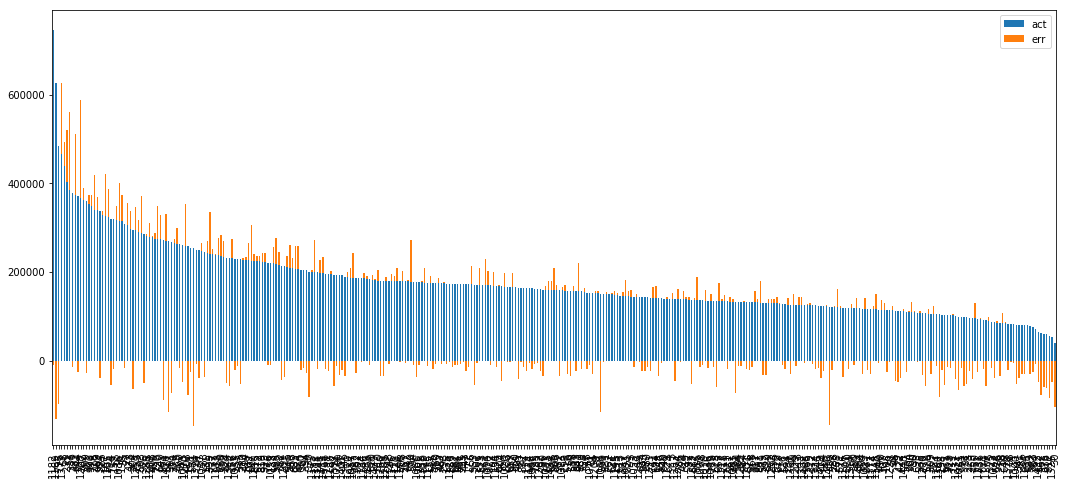

In [17]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(figsize=(18, 8))

final=data.sort_values('act',ascending=False)
final = final[['act','err']]
final.plot.bar(stacked=True,ax=axarr)

## **Implement Random Forest**

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)
val_pred = rf_model.predict(val_X)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_pred,val_y)

print("Validation MAE for Random Forest Model: {:.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 22762


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
data2=pd.DataFrame({'pred':val_pred,'act':val_y}).sort_index(ascending=True)
data2['pred']=data2['pred'].astype('int')
data2['err']=data2.act-data2.pred

In [20]:
data2.sort_values('err',ascending=False).head()

,pred,act,err
53,215075,385000,169925
1182,626158,745000,118842
481,260190,374000,113810
503,176190,289000,112810
58,341943,438780,96837


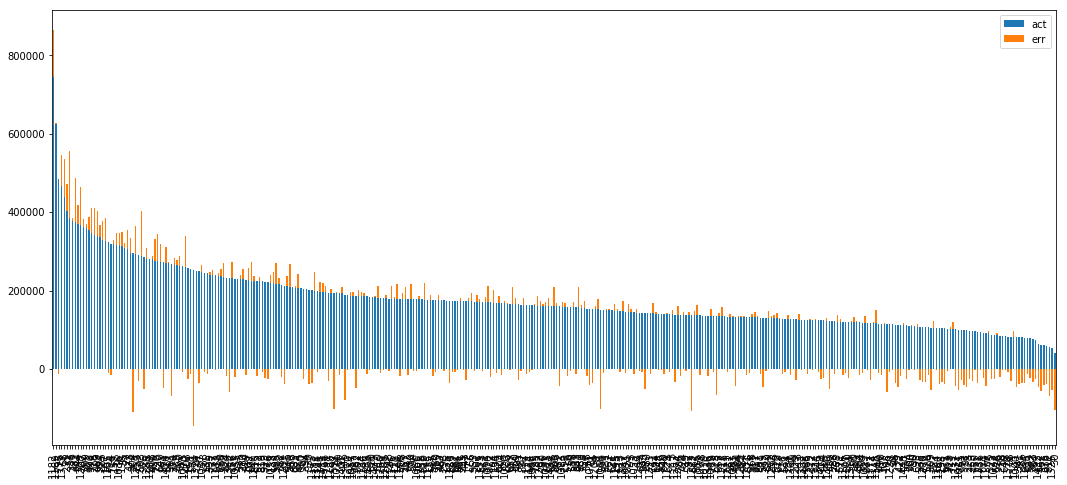

In [21]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(figsize=(18, 8))

final2=data2.sort_values('act',ascending=False)
final2 = final2[['act','err']]
final2.plot.bar(stacked=True,ax=axarr)

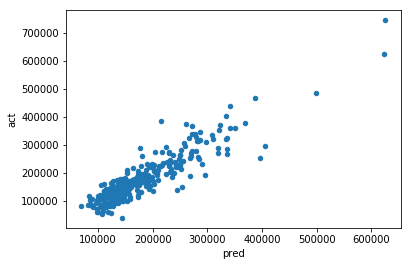

In [22]:
data2.plot.scatter('pred','act')

## Implement SVM regression

In [ ]:
from sklearn import svm
clf = svm.SVR()
clf.fit(train_X,train_y) 
val_pred = clf.predict(val_X)

# Calculate the mean absolute error of your SVR  model on the validation data
svr_val_mae = mean_absolute_error(val_pred,val_y)
svr_val_mae

## SVM with other categorical features

In [ ]:
y = home_data.SalePrice
X = home_data.iloc[:,:-1]
X.drop(columns=['Alley','Fence','FireplaceQu','MiscFeature','PoolQC'])
X = X.fillna(0)
X = pd.get_dummies(X)
# Split into validation and training data
strain_X, sval_X, strain_y, sval_y = train_test_split(X, y, random_state=1)

In [ ]:
# Initiate the model
clf = svm.SVR(kernel='linear', C=100,gamma=.1) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
clf.fit(strain_X,strain_y)
sval_pred = clf.predict(sval_X)

# Calculate the mean absolute error of your SVR  model on the validation data
svr_val_mae = mean_absolute_error(val_pred,sval_y)
svr_val_mae

In [ ]:
data3=pd.DataFrame({'pred':sval_pred,'act':sval_y}).sort_index(ascending=True)
data3['pred']=data3['pred'].astype('int')
data3['err']=data3.act-data3.pred

In [ ]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(figsize=(18, 8))

final3=data3.sort_values('act',ascending=False)
final3 = final3[['act','err']]
final3.plot.bar(stacked=True,ax=axarr)